# IAP 2022: Advanced Optimization Session (Session 1)

**Shuvomoy Das Gupta**

## Response for the advanced optimization session

* Convex programming (32%)
* Integer programming (28%)
* Nonconvex programming (28%)
* Semidefinite programming (5%)
* Other

Based on the responses, I will cover the following topic today.

# Topics

---
$\textsf{Session 1: Convex Optimization and Extension}$
---

* How to model an optimization problem in a tractable manner


* Tractable optimization models


* Convex optimization through `Convex.jl` and `JuMP`


* Modeling examples of common convex programs that shows up in OR


* What to do when the problem is nonconvex


---
$\textsf{Session 2: Discrete Optimization: Basic and Advanced}$
---

* Mixed Integer Linear Programs (MILP): basic


* How MILPs are solved: Branch-and-Bound algorithm


* How do we exploit structures to speed up MILPs


* Solving Mixed Integer Quadratic Problems

## Modeling an optimization problem 

* We have our research problem, that usually come from a practical problem rooted in reality. 

* While modeling the problem, we want to stay as close to reality as possible, but without making the model intractable. 

* This is a balance. Safety-critical constraints have to be modeled exactly, where soft constraints can be relaxed.

* It is a good practice to be considerate during the modeling phase so we end up with a model that is practically tractable.

### Some good resources on how to model optimization problems

* Model building in mathematical programming by H Williams ([Link](https://www.amazon.com/Model-Building-Mathematical-Programming-Williams/dp/1118443330))
  * A very practical book for modeling LP and MILP
  

* Optimization models by G Calafiore and L El Ghaoui ([Link](https://www.amazon.com/Optimization-Models-Giuseppe-C-Calafiore/dp/1107050871))
  * Good book for modeling convex optimization problems, especially Chapter 9, 10, 11  
  
  
  
* Applications of optimization with Xpress-MP by C Guéret, C Prins, and M Sevaux ([Link](https://www2.isye.gatech.edu/~sahmed/isye3133b/XpressBook.pdf))
  * Excellent for modeling integer optimization models, especially Chapter 3, with lot of shortcuts and hacks  

## Modeling an optimization problems

At present the following types of problems are *practically tractable*. Whenever we are modeling an optmization problem, we should try to ensure that our model is one of the following:

1. Linear programs (LP)



2. Quadratic convex programs (QCP)



3. Second order cone programs (SOCP)



4. Semidefinite programs (SDP)



5. Mixed-integer linear programs (MILP)

## My modeling strategies

* **Solve the smaller optimization problem first**

> Thomson's Rule for First-Time Telescope Makers: "It is faster to *make a four-inch mirror then a six-inch mirror* than to *make a six-inch mirror*."

I follow a modified version of Thomson's rule

It is faster to **solve a smaller simpler optimization model and then the larger complicated optimization model** than to *solve a larger complicated optimization model*.

* **Do not optimize prematurely**

> "The real problem is that programmers have spent far too much time worrying about efficiency in the wrong places and at the wrong times; premature optimization is the root of all evil (or at least most of it) in programming.” 
> - Donald Knuth, The Art of Computer Programming

## Milestones in optimization


* 1947: G. Dantzig, who works for US air-forces, presents the Simplex method for solving LP-problems



* 1948: J. Von Neumann establishes the theory of duality for LP-problems



* 1951: H.W. Kuhn and A.W. Tucker reinvent Karush's optimality conditions (known as KKT conditions) 



* 1951: H. Markowitz presents his portfolio optimization theory => (1990 Nobel prize)



* 1954: L.R. Ford's and D.R. Fulkerson's research on network problems => start of combinatorial optimization



* 1960-1970: Many of the early works on first-order optimization algorithms are done (mostly developed in Soviet Union)



* 1983: Nesterov comes up with accelerated gradient descent



* 1984: N. Karmarkar's polynomial time algorithm for LP-problems begins a boom period for interior point methods



* 1990s: Semidefinite optimization theory



* 2015s: First-order methods become very hot again due to machine learning

## General convex optimization problem

Most authoritative reference is Convex Optimization by Boyd and Vandenberghe ([pdf](https://web.stanford.edu/~boyd/cvxbook/)).

Convex optimization problems are defined through the notion of convex set.

**Convex set**

<img src="img/convex_set.png" alt="Drawing1" style="width: 700px;"/>

**Convex function**

A function  is convex if and only if the region above its graph is a convex set.


<img src="img/convex_function.png" alt="Drawing1" style="width: 500px;"/>

## Standard form of a convex optimization problem

A general convex optimization problem has
the following form:
$$
\begin{array}{ll}
\underset{x\in\mathbf{R}^{d}}{\mbox{minimize}} & f_{0}(x)\\
\mbox{subject to} & a_{i}^{\top}x=b_{i},\quad i=1,\ldots,p,\\
 & f_{i}(x)\leq0,\quad i=1,\ldots,m.
\end{array}
$$
 where the equality constraints are linear and the functions $f_{0},f_{1},\ldots,f_{m}$
are convex. 

## Convex optimization

* a subclass of optimization problems that includes LP as special case


* convex problems can look very difficult (nonlinear, even
nondifferentiable), but like LP can be solved very efficiently


* convex problems come up more often than was once thought


* many applications recently discovered in control, combinatorial
optimization, signal processing, communications, circuit design,
machine learning, statistics, finance, . . .

## General approaches to using convex optimization

* Pretend/assume/hope $f_i$ are convex (around minimum) and proceed $\Rightarrow \textsf{Machine Learning in Practice}$ 
    - easy on user (problem specifier)
    - but lose many benefits of convex optimization
    - risky to use in saftey-critical application domain
    - an important example `Adam`: one of the most heavily used solver for deep learning.  (also see [Link](https://arxiv.org/pdf/1804.10587.pdf))
    
    
* Verify problem is convex (around minimum) before attempting solution $\Rightarrow \textsf{Machine Learning Theory}$ 
     - but verification for general problem description is hard  
     
     
* Model the problem in a way that results in a convex formulation  $\Rightarrow \textsf{Operations Research}$ 
    - user needs to follow a restricted set of rules and methods
    - convexity verification is automatic

Each has its advantages, but we focus on 3rd approach.

## How can you tell if a problem is convex?

* Need to check convexity of a function

Approaches:
* use basic definition, first or second order conditions, e.g., $\nabla^2 f(x) \succeq 0$
* via convex calculus: construct $f$ using
  - library of basic examples or atoms that are convex
  - calculus rules or transformations that preserve convexity

## Basic convex functions (convex atoms)

* $x^{p}$ for $p\geq1$ or $p\leq0$; $-x^{p}$ for $0\leq p\leq1$

* $e^{x},$$-\log x$, $x\log x$

* $a^{\top}x+b$

* $x^{\top}x$; $x^{\top}x/y$ (for $y>0$); $\sqrt{x^{\top}x}$

* $\|x\|$ (any norm)

* $\max(x_{1},\ldots,x_{n})$

* $\log(e^{x_{1}}+\ldots+e^{x_{n}})$

* $\log\det X^{-1}$ (for $X\succ0$)

These are also called *atom*s because they are building block of much more complex convex functions. There are many such atoms, most convex programs in practice can be built from these atoms. A more complete list can be found [here](https://jump.dev/Convex.jl/stable/operations/). 

When modeling a problem, we aim to construct a model in such a way so that the building blocks of the functions are the atoms above. 

## Convex calculus rules

* nonnegative scaling: if $f$ is convex then $\alpha f$ is convex
if $\alpha\geq0$



* sum: if $f$ and $g$ are convex, then so is $f+g$



* affine composition: if $f$ is convex, then so is $f(Ax+b)$



* pointwise maximum: if $f_{1},f_{2},\ldots,f_{m}$ are convex, then
so is $f(x)=\max_{i\in\{1,\ldots,m\}}f_{i}(x)$ 

* pointwise supremum: if $f(x,y)$ is convex in $x$ for all $y \in S$, then $g(x) = \textrm{sup}_{y \in S}{f(x,y)}$ is convex



* partial minimization: if $f(x,y)$ is convex in $(x,y)$ and $C$
is convex, then $g(x)=\min_{y\in C}f(x,y)$ is convex



* composition: if $h$ is convex and increasing and $f$ is convex,
then $g(x)=h(f(x))$ is convex

## The function that may show up in your model can be much more complicated

Many complicated convex functions that we can use in the modeling phase can build from the atoms through convex calculus.

* piecewise-linear function: $f(x)=\max_{i=1,\ldots,k}(a_{i}^{\top}x+b_{i})$



* $\ell_{1}$-regularized least-squares cost: $\|Ax-b\|_{2}^{2}+\lambda\|x\|_{1}$
with $\lambda\geq0$


* support-function of a set: $S_C(x)= \max_{y \in C}{x^\top y}$ where $C$ is any set



* distance to convex set: $f(x)=\min_{y\in C}\|x-y\|_{2}$

## Basic modeling steps

* When modeling a problem we face many choices how to mathematically model a certain reality


* During the modeling phase try to select your functions with their building blocks as convex atoms


* When modeling some operation on a mathematical object try to use convex calculus rules


* If you can follow the last two steps, you will have a convex problem


* If you have a nonconvex problem (that is not mixed integer linear program), you can try one of the two things:
   - Work with tightest convex approximation of the nonconvex problem (will see one example)
   - *Sequential convex programming*, a local optimization method for nonconvex problems that leverages convex optimization (works suprisingly well in my experience)

## Linear programs

$$
\begin{array}{ll}
\underset{x\in\mathbf{R}^{d}}{\mbox{minimize}} & c^{\top}x\\
\mbox{subject to} & Ax=b,\\
 & Cx\geq d.
\end{array}
$$

Shows up when we are modeling system that can be completely described by linear equalities and inequalities.

## Quadratic convex programs (QCP)

$$
\begin{array}{ll}
\underset{x\in\mathbf{E}}{\mbox{minimize}} & c^{\top}x+x^{\top}\underbrace{Q_{0}}_{\succeq0}x\\
\mbox{subject to} & Ax=b,\\
 & x^{\top}\underbrace{Q_{i}}_{\succeq0}x+q_{i}^{\top}x+r_{i}\leq0,\quad i=1,\ldots,p.
\end{array}
$$

#### Where does it show up?

QCP mostly show up in data fitting problems such as least-squares and its variants.

## Second order cone programs (SOCP)

$$
\begin{array}{ll}
\underset{x\in\mathbf{R}^{d}}{\mbox{minimize}} & c^{\top}x\\
\mbox{subject to} & \|A_{i}x+b_{i}\|_{2}\leq q_{i}^{\top}x+d_{i},\quad i=1,\ldots,p,\\
 & Cx\leq f.
\end{array}
$$

* SOCP is a generalization of LP and QCP
*  Allows for linear combinations of variables to be constrained inside a special convex set, called a second-order cone

<img src="IAP 2022 Advanced Optimization Session.assets/image-20220117142714899.png" alt="image-20220117142714899" style="zoom: 50%;" />

* Shows up in: geometry problems, approximation problems, chance-constrained linear optimization problems

## Semidefinite programs (SDP)

Recall that LP in standard form is:
$$
\begin{array}{ll}
\underset{x\in\mathbf{R}^{d}}{\mbox{minimize}} & c^{\top}x\\
\mbox{subject to} & a_{i}^{\top}x=b_{i},\quad i=1,\ldots,m,\\
 & x\succeq0.
\end{array}
$$
An SDP is a generalization of LPs. Standard form of an SDP is:
$$
\begin{array}{ll}
\underset{X\in\mathbf{R}^{d\times d}}{\mbox{minimize}} & \mathbf{tr}(CX)\\
\mbox{subject to} & \mathbf{tr}(A_{i}X)=b_{i},\quad i=1,\ldots,m,\\
 & X\succeq0.
\end{array}
$$

* Among all convex models, SDP is the most useful in my opinion.
* Shows up in:
  * sophisticated relaxations (approximations) of non-convex problems,
  * in control design for linear dynamical systems,
  *  in system identification,
  * in algebraic geometry, and
  * in matrix completion problems.

## Mixed-integer linear programs (MILP) (Session 2)

$$
\begin{array}{ll}
\underset{x,y}{\mbox{minimize}} & c^{\top}x+d^{\top}y\\
\mbox{subject to} & Ax+By=b,\\
 & Cx+Dy\geq f,\\
 & x\succeq0,\\
 & x\in\mathbf{R}^{d},\\
 & y\in \mathbf{Z}^{n}.
\end{array}
$$

* Nonconvex, but "practically tractable" in many situations
* MILP solvers have gained a speed-up factor of 2 trillion in the last 40 years!
* Wide modeling capability
* Usually shows up in situations where
  * modeling do/don't do decisions
  * logical conditions
  * implications (if something happens do this)
  * either/or

# Modeling and solving common convex models in `Julia`

### Example of QCP: portfolio optimization


Assume that we have a portfolio with $n$ assets at the beginning of time period $t$.

Given some forecasts on risks and expected returns we try to find the optimal portfolio that rebalances the portfolio to achieve a good balance between expected risk (variance) $x^\top \Sigma x$ and returns $\mu^\top x$​​.

In it's simplest form we want to solve:
$$
\begin{array}{ll} \text{minimize} &  	 \gamma (x^\top \Sigma x) -\mu^\top x \\
\text{subject to} &  1^\top x = d + 1^\top x^0 \\
                    &  x  \geq 0,
 \end{array}
$$
with variable $x \in \mathbf{R}^n$, $\mu$ forecasted (expected) returns, $\gamma > 0 $ risk aversion parameter.

* $x^0_i$ represents the initial investment in asset $i$ and $d$ represents the cash reserve.
* The equality constraint tells us that the sum of the new allocation vector $x$​ has to equal the initial allocation plus the cash reserve
* the covariance matrix of our risk model is given by $\Sigma \in \mathbf{S}_+^n$​.

In [49]:
# Load the packages 
using MosekTools, Mosek, Random, Convex, JuMP, Suppressor, Images, DelimitedFiles
# using COSMO, Random, Convex, JuMP, Suppressor, Images, DelimitedFiles

In [50]:
# Load the data
include("img//portfolio_data.jl");

### Solving the problem using `Convex.jl`

To solve this problem, we will use `Convex.jl`, which is a specialized `Julia` package for solving convex optimization problem.

Declare the variable $x$.

In [52]:
x = Variable(n)

Variable
size: (50, 1)
sign: real
vexity: affine
id: 163…310

Let us now the define the objective $ \gamma (x^\top \Sigma x) -\mu^\top x $.

In [55]:
objective = γ*quadform(x,Σ) - dot(x,μ) 

+ (convex; real)
├─ * (convex; positive)
│  ├─ 1.0
│  └─ * (convex; positive)
│     ├─ 1
│     └─ qol_elem (convex; positive)
│        ├─ …
│        └─ …
└─ - (affine; real)
   └─ sum (affine; real)
      └─ .* (affine; real)
         ├─ …
         └─ …

Note, the list of all the functions `Convex.jl` can model directly is available at [https://jump.dev/Convex.jl/stable/operations/#Linear-Program-Representable-Functions](https://jump.dev/Convex.jl/stable/operations/#Linear-Program-Representable-Functions).

Add the constraint $1^\top x = d + 1^\top x^0$.

In [56]:
constraint_linear = ( sum(x) == d + sum(x0) )

== constraint (affine)
├─ sum (affine; real)
│  └─ 50-element real variable (id: 163…310)
└─ 1

Now add the positivity constraint.

In [57]:
constraint_pos = ( x >= 0 )

>= constraint (affine)
├─ 50-element real variable (id: 163…310)
└─ 0

Next, combine everything in a `problem`.

In [58]:
problem = minimize(objective, [constraint_linear, constraint_pos])

minimize
└─ + (convex; real)
   ├─ * (convex; positive)
   │  ├─ 1.0
   │  └─ * (convex; positive)
   │     ├─ …
   │     └─ …
   └─ - (affine; real)
      └─ sum (affine; real)
         └─ …
subject to
├─ == constraint (affine)
│  ├─ sum (affine; real)
│  │  └─ 50-element real variable (id: 163…310)
│  └─ 1
└─ >= constraint (affine)
   ├─ 50-element real variable (id: 163…310)
   └─ 0

status: `solve!` not called yet

Now time to solve the problem!

In [60]:
solve!(problem, Mosek.Optimizer)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 107             
  Cones                  : 2               
  Scalar variables       : 107             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

Get the solution now.

In [61]:
x_sol = Convex.evaluate(x)

50-element Vector{Float64}:
  0.027228140397089203
  0.03226496898357304
  0.040521154749669115
  5.045416303584319e-12
  0.021044660297784817
 -1.904956297667087e-11
  0.050557306144882554
  0.05394663344893841
 -1.408664747030976e-11
  0.04398393358377368
  0.019242404142878675
  0.03770907944017934
  0.03056528224454937
  ⋮
  0.02068750776254753
  0.06466324439231913
  0.02198422135523888
  0.004512499567966097
 -1.9802434781250454e-11
  0.024926436958510417
  0.0301004341433809
  0.01383265358539451
  5.481331048553427e-11
  0.02848213497329782
  0.043080956668940386
 -1.835093072354754e-11

Get the optimal value.

In [62]:
p_star = Convex.evaluate(objective)

0.040854380927766734

So, combining everything together, the code to solve the portfolio optimization problem using `Convex.jl` would be:

In [11]:
## Define the problem
x = Variable(n);
objective = γ*quadform(x,Σ) - dot(x,μ);
constraint_linear = ( sum(x) == d + sum(x0) );
constraint_pos = ( x >= 0 );
problem = minimize(objective, [constraint_linear, constraint_pos]);

## Solve the problem
solve!(problem, Mosek.Optimizer);

## Extract the solution
x_sol = Convex.evaluate(x);
p_star = Convex.evaluate(objective);

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 107             
  Cones                  : 2               
  Scalar variables       : 107             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

### Solving the problem using `JuMP`

There is nothing special solving a problem via `Convex.jl` over `JuMP`. We could solve the same problem using `JuMP` with the following code.

In [63]:
## Define the problem
using JuMP
model = Model(Mosek.Optimizer)
@variable(model, xs[1:n] >= 0)
@objective(model, Min,  γ * xs'*Σ*xs  - μ' * xs);
@constraint(model, sum(xs) .== d + sum(x0))

## Solve the problem
optimize!(model)

## Get the optimal solution
x_sol_JuMP = value.(xs)
p_star_JuMP = objective_value(model)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 53              
  Cones                  : 1               
  Scalar variables       : 103             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

0.040854380289201415

Because we used the same solver, we hope to get the same optimal solution.

In [64]:
norm(x_sol - x_sol_JuMP)

2.184720444565889e-8

### When to use `JuMP` vs `Convex.jl`?

* Usually `JuMP`'s model creation time is somewhat faster than `Convex.jl`, so if you are working on a problem, where performance is key, then using `JuMP` is a good idea.
* If you are in the prototyping phase of your model and you feel that you are working with a lot of convex-ish functions, then working with `Convex.jl` might be a good idea.
  * For example, suppose, in the last problem you are interested in finding a sparse portfolio with the risk being less than some bound. Within convex optimization framework, one way doing this is by minimizing the $\ell_1$​ norm of $x$​, i.e., consider the modified objective  $\mu^\top x + \gamma \| x\|_1$​ and the additional constraint $x^\top \Sigma x \leq \delta$. If we want to do this modification via `JuMP`, then the right approach is reformulate the  $\ell_1$​ norm via epigraph etc, but `Convex.jl` will take this term as it is.


$\|x\|_1$ = `norm(x,1)`

$x^\top \Sigma x$ = `quadform(x_sparse,Σ)`

In [65]:
## Define the problem (student)
δ = 0.5
x_sparse = Variable(n)
objective_sparse = - dot(x_sparse,μ) + γ*norm(x_sparse,1)
constraint_linear = ( sum(x_sparse) == d + sum(x0) )
constraint_pos = ( x_sparse >= 0 )
constraint_additional = ( quadform(x_sparse,Σ) <= δ)
problem_sparse = minimize(objective_sparse, [constraint_linear, constraint_pos, constraint_additional])

## Solve the problem
solve!(problem_sparse, Mosek.Optimizer)

## Extract the solution
x_sol_sparse = Convex.evaluate(x_sparse)
p_star_sparse = Convex.evaluate(objective_sparse)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 208             
  Cones                  : 2               
  Scalar variables       : 157             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 100
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective 

0.9058977602024589

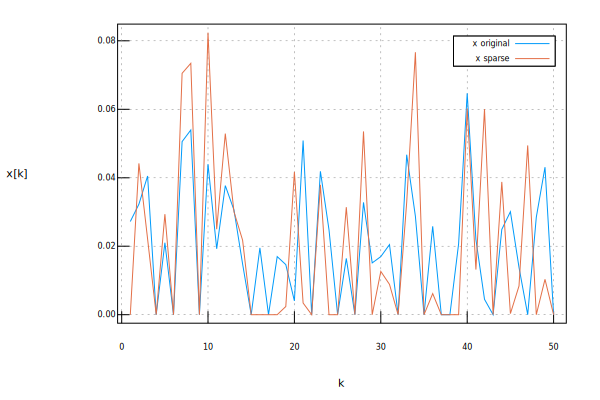

┌ Warning: Gnuplot returned an error message:
│   
│ gnuplot> set term svg size 600,400 font 'sans-serif,16' background rgb '#00ffffff' fontscale 1.0 lw 1.0 dl 1.0 ps 1.0
│                                                                                                                ^
│          line 0: unrecognized terminal option
│ 
└ @ Gaston /home/gridsan/sdgupta/.julia/packages/Gaston/ctAQy/src/gaston_llplot.jl:182


In [66]:
using Plots, Suppressor
gaston()
# inspectdr()
plot([1:n],[x_sol_JuMP x_sol_sparse], xlabel = "k", ylabel = "x[k]", label = [ "x original" "x sparse"])

### Example of SOCP: time series analysis

A time series is a sequence of data points, each associated with a time. In our example, we will work with a time series of daily temperatures in the city of Melbourne, Australia over a period of a few years. Let $\tau$ be the vector of the time series, and $\tau_i$ denote the temperature in Melbourne on day $i$. Here is a picture of the time series:

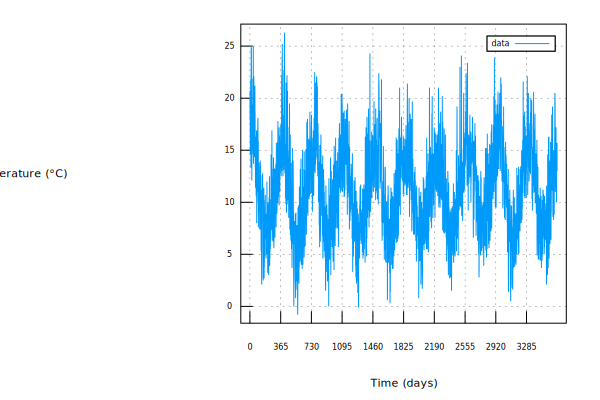

┌ Warning: Gnuplot returned an error message:
│   
│ gnuplot> set term svg size 600,400 font 'sans-serif,16' background rgb '#00ffffff' fontscale 1.0 lw 1.0 dl 1.0 ps 1.0
│                                                                                                                ^
│          line 0: unrecognized terminal option
│ 
└ @ Gaston /home/gridsan/sdgupta/.julia/packages/Gaston/ctAQy/src/gaston_llplot.jl:182


In [67]:
using DelimitedFiles
τ = readdlm("img//melbourne_temps.txt", ',')
n = size(τ, 1)
plot(1:n, τ[1:n], ylabel="Temperature (°C)", label="data", xlabel = "Time (days)", xticks=0:365:n)

A simple way to model this time series would be to find a smooth curve that approximates the yearly ups and downs.
We can represent this model as a vector $x$ where $x_i$ denotes the predicted temperature on the $i$-th day.
To force this trend to repeat yearly, we simply want to impose the constraint

$$
 x_i = x_{i + 365}
$$

for each applicable $i$.

We also want our model to have two more properties:

- The first is that the temperature on each day in our model should be relatively close to the actual temperature of that day and equal if possible.
- The second is that our model needs to be smooth, so the change in temperature from day to day should be relatively small. The following objective would capture both properties:

$$
\sum_{i=1}^{n}|x_{i}-\tau_{i}|+\lambda\sqrt{\sum_{i=2}^{n}(x_{i}-x_{i-1})^{2}}=\|x-\tau\|_{1}+\lambda\|Ax\|_{2},
$$
 where $A$ is a matrix of size $(n-1)\times n$ with $A_{i,i}=-1,A_{i,i+1}=1$
for $i=1,\ldots,n-1$ and the rest of the elements being zero. So,
the optimization problem we want to solve is: 

$$
\begin{array}{ll}
\underset{x\in\mathbf{R}^{d}}{\mbox{minimize}} & \|x-\tau\|_{1}+\lambda\|Ax\|_{2}\\
\mbox{subject to} & x_{i}=x_{i+365},\quad i=1,\ldots,n.
\end{array}
$$
This is an SOCP, because it can be written as: 
$$
\begin{array}{ll}
\underset{x,u,t}{\mbox{minimize}} & \sum_{i=1}^{n}u_{i}+\lambda t\\
\mbox{subject to} & x_{i}=x_{i+365},\quad i=1,\ldots,n, \\
& \|Ax\|_{2}\leq t,\\
 & \vert x_{i}-\tau_{i}\vert\leq u_{i},\quad i=1,\ldots,n.
\end{array}
$$

Here, $\lambda$ is the smoothing parameter. The larger $\lambda$ is, the smoother our model will be.


We will solve this problem using `Convex.jl`, because it would allow us to input the problem directly without manually converting into the SOCP format. 

In [75]:
## Solution using Convex.jl
x = Variable(n)

Variable
size: (3648, 1)
sign: real
vexity: affine
id: 121…269

In [76]:
eq_constraints = [ x[i] == x[i - 365] for i in 365 + 1 : n ];

In [77]:
λ = 100 # smoothing parameter
# Define the matrix A
A = zeros(n-1,n)
for i in 1:n-1
    A[i,i] = -1
    A[i,i+1] = 1
end

In [78]:
smooth_objective = norm(x-τ,1) + λ*norm(A*x,2)

+ (convex; positive)
├─ sum (convex; positive)
│  └─ abs (convex; positive)
│     └─ + (affine; real)
│        ├─ …
│        └─ …
└─ * (convex; positive)
   ├─ 100
   └─ norm2 (convex; positive)
      └─ * (affine; real)
         ├─ …
         └─ …

In [79]:
smooth_problem = minimize(smooth_objective, eq_constraints);

In [80]:
solve!(smooth_problem, Mosek.Optimizer)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 14228           
  Cones                  : 1               
  Scalar variables       : 10946           
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 6931
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.02    
Problem
  Name                   :                 
  Objective

Let's plot our smoothed time estimate vs the original data.

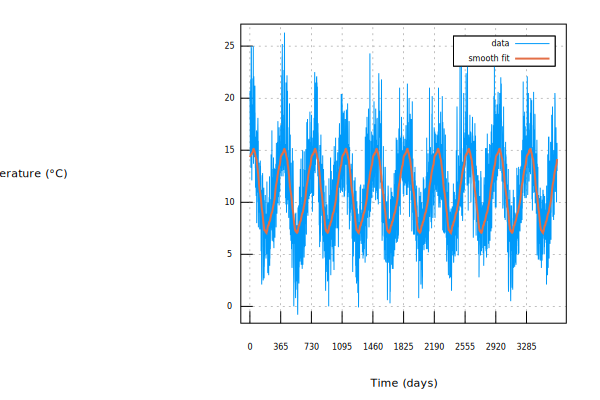

┌ Warning: Gnuplot returned an error message:
│   
│ gnuplot> set term svg size 600,400 font 'sans-serif,16' background rgb '#00ffffff' fontscale 1.0 lw 1.0 dl 1.0 ps 1.0
│                                                                                                                ^
│          line 0: unrecognized terminal option
│ 
└ @ Gaston /home/gridsan/sdgupta/.julia/packages/Gaston/ctAQy/src/gaston_llplot.jl:182


In [81]:
# Plot smooth fit
plot(1:n, τ[1:n], label="data")
plot!(1:n, Convex.evaluate(x)[1:n], linewidth=2, label="smooth fit",  ylabel="Temperature (°C)", xticks=0:365:n, xlabel="Time (days)")

## Matrix completion problem: how to reconstruct a distorted image

Suppose we are given a noisy image, and we want to clean the image up. In countless movies and tv shows, we have seen our hero figuring out who the killer is by polishing a very noisy image in seconds. In reality, this takes a while, and usually is done by solving an SDP. 

Let's take a look at an example. Suppose we are given this very noisy image. This image is the noisy version of a test image widely used in the field of image processing since 1973. See the wikipedia entry [here](https://en.wikipedia.org/wiki/Lenna) for more information.

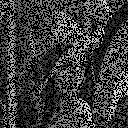

In [82]:
using Images
lenna = load("img//lena128missing.png")

A noisy image is basically a matrix, where lot of the pixels are not reliable. In a way, these unreliable pixels can be treated as missing entries of a matrix, because any $n\times n$ image is nothing but a $n \times n$ matrix. 

First, we convert the $128\times128$ image into a matrix. Here, through some precalculation, I have already filled in the missing entries with zero (for the sake of illustration).

In [83]:
# convert to real matrices
Y = Float64.(lenna)

128×128 Matrix{Float64}:
 0.0       0.0       0.635294  0.0       …  0.0       0.0       0.627451
 0.627451  0.623529  0.0       0.611765     0.0       0.0       0.388235
 0.611765  0.611765  0.0       0.0          0.403922  0.219608  0.0
 0.0       0.0       0.611765  0.0          0.223529  0.176471  0.192157
 0.611765  0.0       0.615686  0.615686     0.0       0.0       0.0
 0.0       0.0       0.0       0.619608  …  0.0       0.0       0.2
 0.607843  0.0       0.623529  0.0          0.176471  0.192157  0.0
 0.0       0.0       0.623529  0.0          0.0       0.0       0.215686
 0.619608  0.619608  0.0       0.0          0.2       0.0       0.207843
 0.0       0.0       0.635294  0.635294     0.2       0.192157  0.188235
 0.635294  0.0       0.0       0.0       …  0.192157  0.180392  0.0
 0.631373  0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.627451  0.635294  0.666667     0.172549  0.0       0.184314
 ⋮                                       ⋱  ⋮           

#### Goal 
Our goal is to find a the missing entries of this matrix $Y$ and thus reconstruct the image and hopefully figure out who this person is. 

#### Constraint to impose
* Ofcourse, we want to ensure that in the reconstructed image, call it $X$, for the available pixels, both images agree, i.e., for any $(i,j)$ in the index set of observed entries, we have $X_{i,j} = Y_{i,j}$. 

#### But how to fill in the rest of the entries? 

One reasonable of way of doing it finding the simplest image that fits the observed entries. Simplicity of an image when traslated to a matrix can correspond to a matrix with low rank. In other words, we want to minimize the rank of the decision matrix $X$, but subject to $X_{i,j} = Y_{i,j}$ for the observed pixels.

\begin{array}{ll}
\underset{X}{\mbox{minimize}} & \text{rank}(X)\\
\mbox{subject to} & X_{i,j}=Y_{i,j},\quad(i,j)\in\text{observed pixels of }Y
\end{array}

But this is a very hard problem and solving to certifiable global optimality is an active research area. As of now, problems beyond matrix size of $50\times 50$ cannot be solved in a tractable fashion. You can see Ryan's paper on how to solve low-rank problems to certifiable global optimality [here](http://www.optimization-online.org/DB_FILE/2020/09/8031.pdf).

#### The best convex approximation of the problem

To work around this issue, rather than minimizing $\textrm{rank}(X)$ we minimize the best convex approximation of the rank function, which is the nuclear norm of $X$, denoted by $\| X \|_\star$, which is equal to the sum of singular values of the matrix $X$. So, we solve:

\begin{array}{ll}
\underset{X}{\mbox{minimize}} & \| X \|_\star \\
\mbox{subject to} & X_{i,j}=Y_{i,j},\quad(i,j)\in\text{observed pixels of }Y
\end{array}

The problem above can be formulated as an SDP.

Find the index set of the observed entries.

In [26]:
observed_entries_Y = findall(x->x!=0.0, Y)

8128-element Vector{CartesianIndex{2}}:
 CartesianIndex(2, 1)
 CartesianIndex(3, 1)
 CartesianIndex(5, 1)
 CartesianIndex(7, 1)
 CartesianIndex(9, 1)
 CartesianIndex(11, 1)
 CartesianIndex(12, 1)
 CartesianIndex(17, 1)
 CartesianIndex(19, 1)
 CartesianIndex(20, 1)
 CartesianIndex(23, 1)
 CartesianIndex(25, 1)
 CartesianIndex(26, 1)
 ⋮
 CartesianIndex(113, 128)
 CartesianIndex(114, 128)
 CartesianIndex(115, 128)
 CartesianIndex(116, 128)
 CartesianIndex(119, 128)
 CartesianIndex(120, 128)
 CartesianIndex(121, 128)
 CartesianIndex(122, 128)
 CartesianIndex(123, 128)
 CartesianIndex(124, 128)
 CartesianIndex(125, 128)
 CartesianIndex(127, 128)

Find size of the matrix.

In [27]:
N, N = size(Y)

(128, 128)

Declare the variable $X$.

In [28]:
X = Variable(N,N)

Variable
size: (128, 128)
sign: real
vexity: affine
id: 867…105

Add the objective $\| X \|_\star$.

In [29]:
obj_SDP = nuclearnorm(X)

nuclearnorm (convex; positive)
└─ 128×128 real variable (id: 867…105)

Now add the constraints $X_{i,j} = Y_{i,j}$ for all $(i,j) \in \texttt{observed_entries_Y}$.

In [30]:
constraints_SDP = Convex.Constraint[]

Constraint[]

In [31]:
for index_i_j in observed_entries_Y
    i = index_i_j[1]
    j = index_i_j[2]
    push!(constraints_SDP,  X[i,j] == Y[i,j])
end

Create the problem now!

In [32]:
problem_SDP = minimize(obj_SDP, constraints_SDP)

minimize
└─ nuclearnorm (convex; positive)
   └─ 128×128 real variable (id: 867…105)
subject to
├─ == constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 128×128 real variable (id: 867…105)
│  └─ 0.627451
├─ == constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 128×128 real variable (id: 867…105)
│  └─ 0.611765
├─ == constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 128×128 real variable (id: 867…105)
│  └─ 0.611765
├─ == constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 128×128 real variable (id: 867…105)
│  └─ 0.607843
├─ == constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 128×128 real variable (id: 867…105)
│  └─ 0.619608
├─ == constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 128×128 real variable (id: 867…105)
│  └─ 0.635294
├─ == constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 128×128 real variable (id: 867…105)
│  └─ 0.631373
├─ == constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 128×128 real variable (id: 867…105)
│  └─ 0.662745


In [33]:
# [💀] Do not run on a laptop, I am solving this on MIT Supercloud
# This is a problem requiring lot of memory
# Constraints            : 73665           
# Scalar variables       : 49153 
solve!(problem_SDP, Mosek.Optimizer)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 73665           
  Cones                  : 0               
  Scalar variables       : 49153           
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.05    
Problem
  Name                   :                 
  Objective se

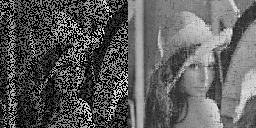

In [84]:
X_sdp_sol = Convex.evaluate(X);
lenna_original = load("img//Lenna_(test_image).png")
# [lenna colorview(Gray, X_sdp_sol) lenna_original]
[lenna colorview(Gray, X_sdp_sol)]

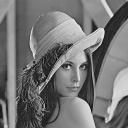

In [35]:
lenna_original

### Solving the same problem using JuMP

To model the same problem in `JuMP`, we need to convert it into a traditional SDP. To that goal, write 


\begin{align*}
 & \left(\begin{array}{ll}
\underset{X}{\mbox{minimize}} & \|X\|_{\star}\\
\mbox{subject to} & X_{i,j}=Y_{i,j},\quad(i,j)\in\textrm{observed pixels of }Y.
\end{array}\right)\\
= & \left(\begin{array}{ll}
\underset{X,t}{\mbox{minimize}} & t\\
\mbox{subject to} & X_{i,j}=Y_{i,j},\quad(i,j)\in\textrm{observed pixels of }Y,\\
 & \|X\|_{\star}\leq t.
\end{array}\right)
\end{align*}


Use the result [Lemma 1 Fazel et. al. (2001)]  ([paper here](https://web.stanford.edu/~boyd/papers/pdf/rank_min_heur_sys_approx.pdf)) we have: 
$$
\left(\|X\|_{\star}\leq t\right)\Leftrightarrow\begin{bmatrix}U & X\\
X^{\top} & V
\end{bmatrix}\succeq0,\mathbf{tr}(U)+\mathbf{tr}(V)\leq2t,
$$
where the proof is nontrivial (to me). 

$$
\left(\begin{array}{ll}
\underset{X,t,U,V}{\mbox{minimize}} & t\\
\mbox{subject to} & X_{i,j}=Y_{i,j},\quad(i,j)\in\textrm{observed pixels of }Y,\\
 & \begin{bmatrix}U & X\\
X^{\top} & V
\end{bmatrix}\succeq0,\\
 & \mathbf{tr}(U)+\mathbf{tr}(V)\leq2t.
\end{array}\right)
$$

In [36]:
using JuMP, Mosek, MosekTools, LinearAlgebra

In [37]:
model_SDP_JuMP = Model(Mosek.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Mosek

In [38]:
@variable(model_SDP_JuMP, X2[1:N, 1:N])

128×128 Matrix{VariableRef}:
 X2[1,1]    X2[1,2]    X2[1,3]    X2[1,4]    …  X2[1,127]    X2[1,128]
 X2[2,1]    X2[2,2]    X2[2,3]    X2[2,4]       X2[2,127]    X2[2,128]
 X2[3,1]    X2[3,2]    X2[3,3]    X2[3,4]       X2[3,127]    X2[3,128]
 X2[4,1]    X2[4,2]    X2[4,3]    X2[4,4]       X2[4,127]    X2[4,128]
 X2[5,1]    X2[5,2]    X2[5,3]    X2[5,4]       X2[5,127]    X2[5,128]
 X2[6,1]    X2[6,2]    X2[6,3]    X2[6,4]    …  X2[6,127]    X2[6,128]
 X2[7,1]    X2[7,2]    X2[7,3]    X2[7,4]       X2[7,127]    X2[7,128]
 X2[8,1]    X2[8,2]    X2[8,3]    X2[8,4]       X2[8,127]    X2[8,128]
 X2[9,1]    X2[9,2]    X2[9,3]    X2[9,4]       X2[9,127]    X2[9,128]
 X2[10,1]   X2[10,2]   X2[10,3]   X2[10,4]      X2[10,127]   X2[10,128]
 X2[11,1]   X2[11,2]   X2[11,3]   X2[11,4]   …  X2[11,127]   X2[11,128]
 X2[12,1]   X2[12,2]   X2[12,3]   X2[12,4]      X2[12,127]   X2[12,128]
 X2[13,1]   X2[13,2]   X2[13,3]   X2[13,4]      X2[13,127]   X2[13,128]
 ⋮                                          

In [39]:
@variable(model_SDP_JuMP, U[1:N, 1:N]);

In [40]:
@variable(model_SDP_JuMP, V[1:N, 1:N]);

In [41]:
@variable(model_SDP_JuMP, t);

In [42]:
for index_i_j in observed_entries_Y
    i = index_i_j[1]
    j = index_i_j[2]
    @constraint(model_SDP_JuMP, X2[i,j] == Y[i,j])
end

In [43]:
@constraint(model_SDP_JuMP, Symmetric([U X2; X2' V]) in PSDCone());

In [44]:
@constraint(model_SDP_JuMP, tr(U)+tr(V) <= 2*t);

In [45]:
@objective(model_SDP_JuMP, Min, t)

t

In [46]:
optimize!(model_SDP_JuMP) 

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 8129            
  Cones                  : 0               
  Scalar variables       : 16257           
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective se

In [47]:
X_Lenna_JuMP = value.(X2)

128×128 Matrix{Float64}:
 0.510133  0.541838  0.635294  0.522442  …  0.470371  0.422462  0.627451
 0.627451  0.623529  0.621339  0.611765     0.404712  0.329829  0.388235
 0.611765  0.611765  0.632581  0.598682     0.403922  0.219608  0.337453
 0.585981  0.581618  0.611765  0.58344      0.223529  0.176471  0.192157
 0.611765  0.581893  0.615686  0.615686     0.297408  0.27872   0.277459
 0.557052  0.520124  0.570136  0.619608  …  0.387982  0.245395  0.2
 0.607843  0.582899  0.623529  0.586153     0.176471  0.192157  0.197013
 0.611249  0.637073  0.623529  0.591021     0.229532  0.192887  0.215686
 0.619608  0.619608  0.596553  0.559789     0.2       0.151996  0.207843
 0.617212  0.58893   0.635294  0.635294     0.2       0.192157  0.188235
 0.635294  0.594272  0.62413   0.653188  …  0.192157  0.180392  0.206486
 0.631373  0.592408  0.607137  0.675214     0.169149  0.224812  0.184314
 0.588056  0.627451  0.635294  0.666667     0.172549  0.22933   0.184314
 ⋮                             

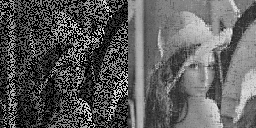

In [48]:
# [lenna colorview(Gray, X_Lenna_JuMP) lenna_original]
[lenna colorview(Gray, X_Lenna_JuMP)]

Time taken by `JuMP` is 25 s whereas time taken by `Convex.jl` is 415 s. The main reason behind the time difference is that, to use `Convex.jl` we could feed it the problem formulation rather than converting into an SDP form, so internally `Convex.jl` converts the model into an SDP programmatically. The converted SDP has the follwoing size:

```
The SDP size in Convex.jl (constructed internally Convex.jl) 
#------------------------------------------
 Constraints            : 73665                      
 Scalar variables       : 49153
```

Whereas, we converted the problem ourselves into an SDP to feed it into `JuMP`. The final formulation was much tighter than what `Convex.jl` does automatically. Note that we invested some time here by researching into google scholar and finding the right paper. The SDP in `JuMP` has the following size:
 
```
The SDP size in JuMP 
#-------------------------
  Constraints            : 8129                       
  Scalar variables       : 16257  
```  

## Sequential convex programming

* Solving a nonconvex problem using a local convex optimization method



* Convex portions of a problem are handled "exactly" and efficiently



* Sequential convex programming is a heuristic, it can fail



* Success often depend on a good starting point



* We consider the nonconvex problem: 


$$
\begin{array}{ll}
\underset{x\in\mathbf{R}^{d}}{\mbox{minimize}} & f_{0}(x)\\
\mbox{subject to} & f_{i}(x)\leq0,\quad i=1,\ldots,m,\\
 & h_{i}(x)=0,\quad j=1,\ldots,p.
\end{array}
$$


where $f_{0}$ and $f_{i}$ are possibly nonconvex, $h_{i}$ are
possibly non-affine. 

## Basic idea of Sequential convex programming

* Maintain the current iterate $x^{(k)}$ and convex trust region $\mathcal{T}^{(k)}$

* Form convex approximation $f_{i}^{\textrm{cvx}}$ of $f_{i}$ over
$\mathcal{T}^{(k)}$

* Form affine approximation $h_{i}^{\textrm{afn}}$ of $h_{i}$ over
$\mathcal{T}^{(k)}$

* Then update the iterate $x^{(k+1)}$ is the optimal point found by
solving the convex problem 
$$
\begin{array}{ll}
\underset{x\in\mathbf{R}^{d}}{\mbox{minimize}} & f_{0}^{\textrm{cvx}}(x)\\
\mbox{subject to} & f_{i}^{\textrm{cvx}}(x)\leq0,\quad i=1,\ldots,m,\\
 & h_{i}^{\textrm{afn}}(x)=0,\quad j=1,\ldots,p,\\
 & x\in\mathcal{T}^{(k)},
\end{array}
$$
which is a convex approximation of the original nonconvex problem.

## How to compute the approximations

Trust region is computed using $\mathcal{T}^{(k)}=\{x\mid\|x-x^{(k)}\|\leq\rho\}$

* $h_{i}^{\textrm{afn}}=h_{i}(x^{(k)})+\nabla h_{i}(x^{(k)})^{\top}(x-x^{(k)})$

* $f_{i}^{\textrm{cvx}}=f_{i}(x^{(k)})+\nabla f_{i}(x^{(k)})^{\top}(x-x^{(k)})+\frac{1}{2}(x-x^{(k)})^{\top}P(x-x^{(k)})$
where $P=\left[\nabla^{2}f(x^{(k)})\right]_{+}$ which is the PSD
part of Hessian